Punto 1

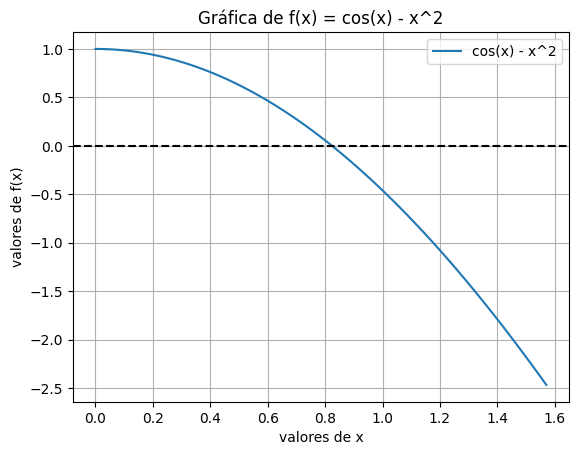

Aproximación inicial a la raíz desde el DataFrame:
x       0.825065
f(x)   -0.002222
Name: 52, dtype: float64
La raíz usando Steffensen es: 0.8241323123025224 (en 3 iteraciones)
La raíz usando el método de bisección es: 0.8241323123033908
La raíz usando el método de secante es: 0.8241323123026507


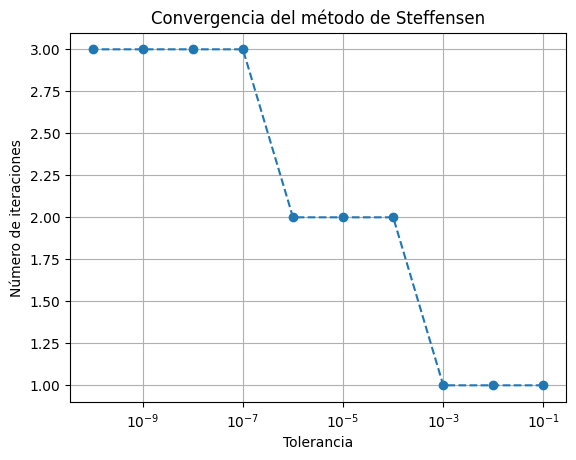

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import bisect, newton
from math import pi

# Parte 1: Método de Steffensen
def steffensen(f, x0, tol=1e-10, maxiter=100):
    """
    La función steffensen recibe:
    f       = función a la cual queremos encontrarle la raíz
    x0      = un punto cercano a la raíz para empezar a evaluar
    tol     = tolerancia para evaluar la proximidad a la raíz
    maxiter = número máximo de iteraciones permitidas
    Retorna:
    x1 = el valor x(n+1) que cumple con la tolerancia
    n  = número de iteraciones realizadas
    """
    n = 0
    while True:
        y0 = x0 + f(x0)
        if f(y0) == f(x0):
            raise ValueError('f(y0) debe ser diferente a f(x0) para evitar división por cero')
        x1 = x0 - (f(x0)**2) / (f(y0) - f(x0))
        n += 1
        if abs(x1 - x0) < tol:
            return x1, n
        if n >= maxiter:
            raise RuntimeError(f'No se ha encontrado la raíz en {maxiter} iteraciones')
        x0 = x1

# Parte 2: Definir la funcion y graficar
fx = lambda x: np.cos(x) - x**2
x = np.linspace(0, pi/2, 100)
y = fx(x)

plt.plot(x, y, label='cos(x) - x^2')
plt.axhline(0, color='black', linestyle='--')  # Linea horizontal para f(x)=0
plt.xlabel('valores de x')
plt.ylabel('valores de f(x)')
plt.grid()
plt.legend()
plt.title('Gráfica de f(x) = cos(x) - x^2')
plt.show()

# Parte 3: Crear un DataFrame y encontrar valor mas cercano a f(x)=0
df = pd.DataFrame({'x': x, 'f(x)': y})
valor_aprox = df.iloc[(df['f(x)'].abs()).argmin()]
print("Aproximación inicial a la raíz desde el DataFrame:")
print(valor_aprox)

# Parte 4: Comparar métodos numéricos
x0_inicial = valor_aprox['x']  # Usamos la aproximación del DataFrame
raiz_aprox, n_terminos = steffensen(fx, x0_inicial, tol=1e-10, maxiter=100)
print(f'La raíz usando Steffensen es: {raiz_aprox} (en {n_terminos} iteraciones)')

raiz_biseccion = bisect(fx, 0, 1.5)
print(f'La raíz usando el método de bisección es: {raiz_biseccion}')

raiz_secante = newton(fx, x0=1.5, x1=1.3)
print(f'La raíz usando el método de secante es: {raiz_secante}')

# Parte 5: Evaluar convergencia segun tolerancia
tol_values = np.logspace(-1, -10, 10)
N_iteraciones = []

for tol in tol_values:
    try:
        _, n_iter = steffensen(fx, x0_inicial, tol=tol, maxiter=100)
        N_iteraciones.append(n_iter)
    except RuntimeError:
        N_iteraciones.append(np.nan)

# Gráfico semilog de iteraciones vs tolerancia
plt.figure()
plt.semilogx(tol_values, N_iteraciones, marker='o', linestyle='--')
plt.xlabel('Tolerancia')
plt.ylabel('Número de iteraciones')
plt.title('Convergencia del método de Steffensen')
plt.grid()
plt.show()


2. A y B

In [ ]:
#Codigo original sin corregir
# Aqui va su código
import math
n=int(input())
def doble_factorial(n):
  """ Calcula el doble factorial """
  if n<=0:
    return 1
  else:
    resultado =1
    for i in range(1,n+1,2):
      resultado *= i
    return resultado
print(doble_factorial(n))
def calcular_cn(n):
  """ caclcula el coeficionte cn """
  if n<=0:
    return 1
  else:
    resultado2=1
    for i in range(1,n+1,2):
      resultado2 = ((doble_factorial(n))/((2**n)*(math.factorial(n))))**2
    return resultado2
print(calcular_cn(n))

def suma_cn_sen(n):
  for i in range(1,n+1):
    valor1= calcular_cn(n)* math.sin(np.deg2rad(90))**(2*n) +1
    valor2= calcular_cn(n)* math.sin(np.deg2rad(15))**(2*n) +1
  return valor1,valor2
T=2*np.pi*math.sqrt(1.2/9.8)*((suma_cn_sen(n)))

Parte A
T0 (formula simple): 2.1986568517060525 s
T(90°, 3 terminos): 2.5507854881121 s, Error vs 10 terminos: 1.705383398825488%
T(15°, 3 terminos): 2.208111273726094 s, Error vs 10 terminos: 4.872243037233658e-05%
Como influye el valor del angulo usado:
Se observa que el error es mayor para 90 grados que para 15 grados
Esto se debe a que la serie de expansion del periodo es más precisa para angulos pequeños,
donde los terminos de orden superior se hacen despreciables mas rapido
Parte B


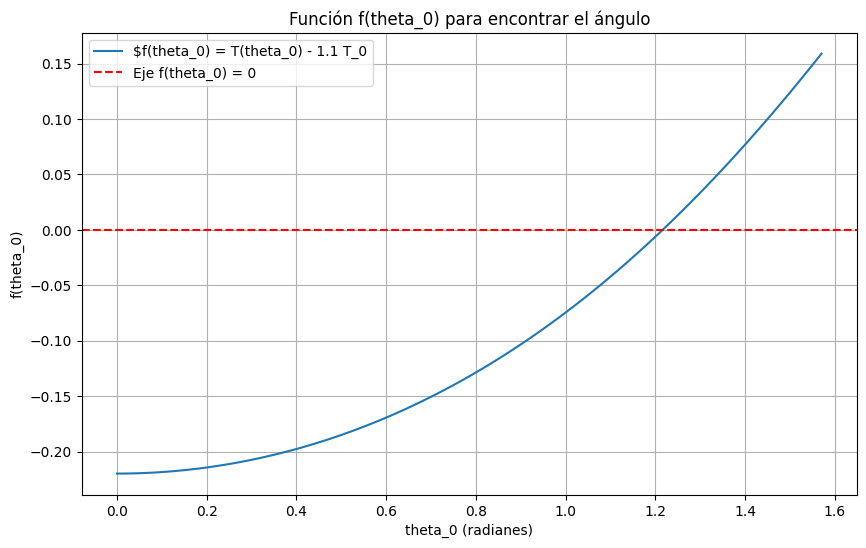

Raiz encontrada con el método de Biseccion: 69.6911791326361 grados (1.2163405354616659 rad)
Raíz encontrada con el método de Newton-Raphson: 69.6912 grados (1.216340535461668 rad)


In [13]:
import math
import numpy as np
from scipy.optimize import brentq, newton
#Version 2
def doble_factorial(n):
    """
    Calcula el doble factorial (2n - 1)!!
    Es el producto de todos los números impares desde 1 hasta (2n-1).
    """
    if n <= 0:
        return 1
    resultado = 1
    for i in range(1, 2 * n, 2): # itera sobre los números impares hasta 2n-1
        resultado *= i
    return resultado

def coeficiente_cn(n):
    """
    Calcula el coeficiente c_n según la fórmula dada:
    c_n = ( (2n-1)!! ) / ( 2^n * n! )
    """
    if n == 0:
        return 1 # c_0 es 1 (término inicial de la serie)

    num = doble_factorial(n) # doble_factorial(n) calcula (2n-1)!!
    den = (2**n) * math.factorial(n)
    return (num / den)**2 # Se eleva al cuadrado según la fórmula T = 2π * sqrt(L/g) * SUM[c_n * sin^2n(theta_0/2)]

def T_aprox(theta_0_deg, L=1.2, g=9.8, n_terminos=3):
    """
    Calcula el periodo T aproximado usando la serie de términos.
    theta_0_deg : Angulo
    L: Longitud del pendulo
    g: Aceleración de la gravedad
    n_terminos: Número de términos a incluir en la serie (desde n=0 hasta n_terminos-1).
                Si n_terminos = 3, se calculan los términos para n=0, n=1, n=2.
    """
    theta_0_rad = np.deg2rad(theta_0_deg)

    suma_serie = 0
    # La serie comienza con n=0, donde c_0 = 1 y sin^0(theta_0/2) = 1
    # Los términos de la serie son:
    # 1 (n=0)
    # + c1 * sin^2(theta_0/2) (n=1)
    # + c2 * sin^4(theta_0/2) (n=2)
    for n in range(n_terminos): # n va de 0 a n_terminos-1
        cn = coeficiente_cn(n)
        suma_serie += cn * (math.sin(theta_0_rad / 2))**(2 * n)

    T0 = 2 * math.pi * math.sqrt(L / g)
    return T0 * suma_serie

#Parámetros del péndulo
L = 1.2
g = 9.8
T0 = 2 * math.pi * math.sqrt(L / g)

print("Parte A")

# Cálculo para 90 grados
T_exact_90 = T_aprox(90, L, g, n_terminos=10) # Consideramos 10 términos como exactos
T_aprox3_90 = T_aprox(90, L, g, n_terminos=3) # Aproximacion con 3 términos
error_90 = abs((T_aprox3_90 - T_exact_90) / T_exact_90) * 100

# Cálculo para 15 grados
T_exact_15 = T_aprox(15, L, g, n_terminos=10) # Consideramos 10 términos como exactos
T_aprox3_15 = T_aprox(15, L, g, n_terminos=3) # Aproximacion con 3 términos
error_15 = abs((T_aprox3_15 - T_exact_15) / T_exact_15) * 100

print(f"T0 (formula simple): {T0} s")
print(f"T(90°, 3 terminos): {T_aprox3_90} s, Error vs 10 terminos: {error_90}%")
print(f"T(15°, 3 terminos): {T_aprox3_15} s, Error vs 10 terminos: {error_15}%")

print("""Como influye el valor del angulo usado:
Se observa que el error es mayor para 90 grados que para 15 grados
Esto se debe a que la serie de expansion del periodo es más precisa para angulos pequeños,
donde los terminos de orden superior se hacen despreciables mas rapido""")

# Parte B
print("Parte B")

def f_theta0(theta_0_rad, L=1.2, g=9.8):
    """
    Define la función f(theta_0) = T(theta_0) - 1.1 * T0 usando los primeros 4 terminos.
    Queremos encontrar theta_0 tal que f(theta_0) = 0
    es decir que se debe cumplir T(theta_0) = 1.1 * T0
    """
    T_val = T_aprox(np.rad2deg(theta_0_rad), L, g, n_terminos=4) # Usar 4 términos
    T0_val = 2 * math.pi * math.sqrt(L / g)
    return T_val - 1.1 * T0_val

# Graficar f(theta_0)
import matplotlib.pyplot as plt

theta_0_rad_values = np.linspace(0, math.pi / 2, 100)
f_values = [f_theta0(theta_rad) for theta_rad in theta_0_rad_values]

plt.figure(figsize=(10, 6))
plt.plot(theta_0_rad_values, f_values, label='$f(theta_0) = T(theta_0) - 1.1 T_0')
plt.axhline(0, color='red', linestyle='--', label='Eje f(theta_0) = 0')
plt.xlabel('theta_0 (radianes)')
plt.ylabel('f(theta_0)')
plt.title('Función f(theta_0) para encontrar el ángulo')
plt.grid(True)
plt.legend()
plt.show()

# Resolución numérica
# Buscamos un punto donde f(theta_0) cruza el eje x (f(theta_0) = 0)
# Observando la gráfica, f(theta_0) parece cruzar cero entre 1 y 1.5 radianes.

# Método de Bisección
a_bisection = 1.0
b_bisection = 1.5
try:
    root_bisection = brentq(f_theta0, a_bisection, b_bisection)
    print(f"Raiz encontrada con el método de Biseccion: {np.rad2deg(root_bisection)} grados ({root_bisection} rad)")
except ValueError:
    print(f"No se encontro una raíz con biseccion en el intervalo [{np.rad2deg(a_bisection)}°, {np.rad2deg(b_bisection)}°].")

# Método de Newton-Raphson utilizando la funcion y un punto inicial
x0_newton = 1.2 # Un punto inicial cercano a la raíz
try:
    root_newton = newton(f_theta0, x0_newton)
    print(f"Raíz encontrada con el método de Newton-Raphson: {np.rad2deg(root_newton):.4f} grados ({root_newton} rad)")
except RuntimeError:
    print(f"No se encontro una raíz con Newton-Raphson desde el punto inicial {np.rad2deg(x0_newton)} grados.")